# EDA: Big_Five Dataset

- We will visualize and analzye the Big Five dataset
- Provide descriptive statistics
- Create visualizations
- Preprocess for modeling
- Model using clustering

In [2]:
# import all modules needed to run this code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans

big_five = pd.read_csv(r"big_five_clean.csv")

pd.set_option('display.max_rows', None) # display all rows and columns
pd.set_option('display.max_columns', None)

# Display basic info about the dataset
print("Dataset Info:")
print(big_five.info())

# Display summary statistics
print("\nSummary Statistics:")
print(big_five.describe())

# Check for missing values
print("\nMissing Values:")
print(big_five.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011499 entries, 0 to 1011498
Data columns (total 50 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   EXT1    1011499 non-null  float64
 1   EXT2    1011499 non-null  float64
 2   EXT3    1011499 non-null  float64
 3   EXT4    1011499 non-null  float64
 4   EXT5    1011499 non-null  float64
 5   EXT6    1011499 non-null  float64
 6   EXT7    1011499 non-null  float64
 7   EXT8    1011499 non-null  float64
 8   EXT9    1011499 non-null  float64
 9   EXT10   1011499 non-null  float64
 10  EST1    1011499 non-null  float64
 11  EST2    1011499 non-null  float64
 12  EST3    1011499 non-null  float64
 13  EST4    1011499 non-null  float64
 14  EST5    1011499 non-null  float64
 15  EST6    1011499 non-null  float64
 16  EST7    1011499 non-null  float64
 17  EST8    1011499 non-null  float64
 18  EST9    1011499 non-null  float64
 19  EST10   1011499 non-null  float64
 20  AGR1    10

In [3]:
big_five.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


- Dataset contains 50 personality-related features
- No missing values in the dataset
- ordinal values (0-5 scale) for all features
- Large sample size (1M+ rows)
- Features grouped into five personality traits:
    - Extraversion (EXT1-EXT10)
    - Neuroticism (Emotional Stability) (EST1-EST10)
    - Agreeableness (AGR1-AGR10)
    - Conscientiousness (CSN1-CSN10)
    - Openness to Experience (OPN1-OPN10)

**Lets Visualize the distribution of personality traits to check for any outlier**

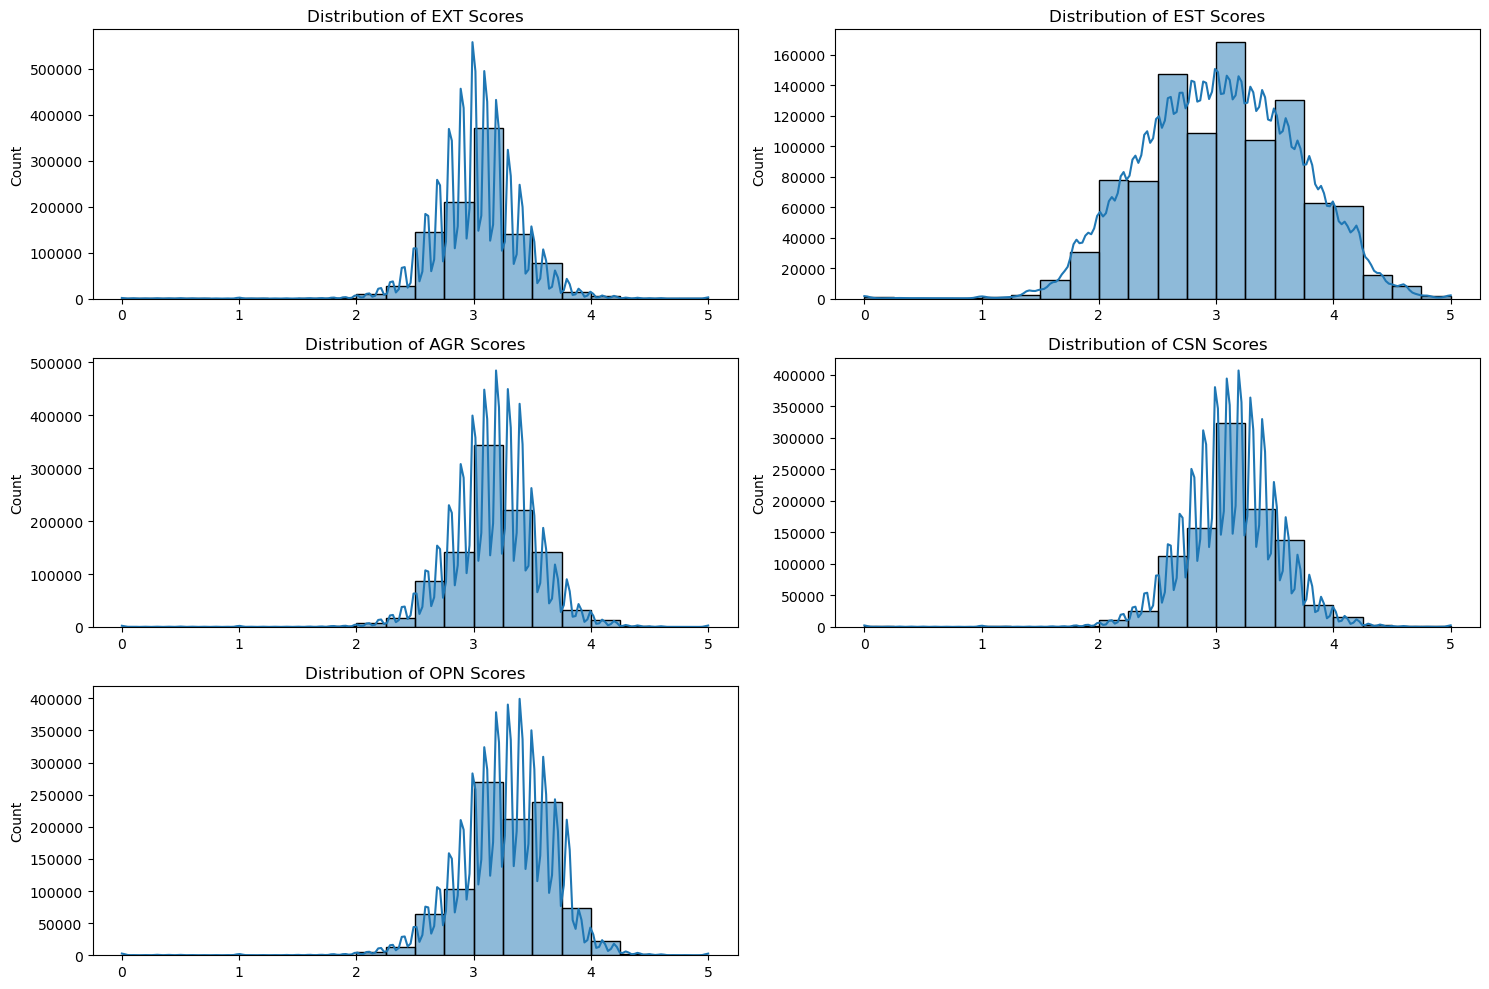

In [6]:
# List of personality trait categories
traits = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']

#  distributions for each trait group
plt.figure(figsize=(15, 10))

for i, trait in enumerate(traits):
    plt.subplot(3, 2, i+1)
    trait_cols = [col for col in big_five.columns if col.startswith(trait)]
    sns.histplot(big_five[trait_cols].mean(axis=1), bins=20, kde=True)
    plt.title(f'Distribution of {trait} Scores')

plt.tight_layout()
plt.show()

**Feature Distributions:**

- The distributions for the five personality traits (EXT, EST, AGR, CSN, OPN) appear to be fairly normal, with most values clustering around the center.
- The density plots suggest that there are no extreme outliers or data skewness.
- Since the data is well-distributed, we may not need transformations before proceeding with possible clustering modeling

- **Next, lets visualize any highly correlated features for possible redundancies**

In [9]:
big_five.corr()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
EXT1,1.000000,-0.451605,0.458951,-0.502354,0.472674,-0.334127,0.578220,-0.383468,0.465784,-0.426463,-0.095889,0.129710,-0.104724,0.105763,-0.048628,-0.064308,-0.009585,-0.026121,-0.058892,-0.182556,-0.019649,0.251204,0.064800,0.085889,-0.105892,0.049209,-0.213921,0.146204,0.126001,0.287465,0.026754,0.042012,-0.002289,-0.024839,0.063877,0.010233,-0.045539,-0.011813,0.042628,0.033116,0.020751,-0.005295,0.065827,0.013122,0.174043,-0.067410,0.059675,0.006809,-0.082190,0.154329
EXT2,-0.451605,1.000000,-0.428259,0.547903,-0.516559,0.537974,-0.456348,0.391108,-0.376442,0.485172,0.053811,-0.010029,0.055851,-0.054558,0.039084,0.023312,0.014483,0.026110,0.034165,0.179013,0.117867,-0.268661,-0.041177,-0.105746,0.197253,-0.046753,0.292745,-0.145214,-0.124679,-0.218377,0.006100,-0.048579,0.036388,0.029041,-0.009373,-0.014717,0.034628,0.060957,-0.026637,-0.007943,-0.040062,0.048477,-0.036021,0.034005,-0.112181,0.086578,-0.033114,-0.027341,0.065941,-0.124291
EXT3,0.458951,-0.428259,1.000000,-0.452958,0.548367,-0.336016,0.536329,-0.310302,0.415637,-0.454796,-0.214854,0.271733,-0.166431,0.197577,-0.147353,-0.185988,-0.164457,-0.194565,-0.210423,-0.331173,-0.105791,0.395200,-0.080321,0.204152,-0.209662,0.112336,-0.348220,0.254927,0.197328,0.362264,0.116189,-0.013694,0.063359,-0.157094,0.144910,-0.065087,0.027586,-0.123114,0.127170,0.084389,0.022267,-0.035637,0.014979,0.004824,0.158295,-0.044221,0.117311,-0.040924,-0.063039,0.121283
EXT4,-0.502354,0.547903,-0.452958,1.000000,-0.478529,0.452447,-0.480369,0.481710,-0.450395,0.532026,0.144674,-0.059990,0.174251,-0.091746,0.107455,0.115843,0.099646,0.109509,0.116339,0.259125,0.080771,-0.220620,0.003887,-0.028818,0.153353,0.015482,0.262818,-0.092742,-0.066932,-0.198298,-0.025404,0.011954,0.051492,0.131504,-0.053365,0.049277,0.055570,0.113322,-0.033522,-0.007844,-0.020528,0.074795,0.034097,0.044417,-0.122658,0.074594,-0.044114,0.001884,0.122356,-0.100256
EXT5,0.472674,-0.516559,0.548367,-0.478529,1.000000,-0.423849,0.584831,-0.330137,0.415230,-0.507553,-0.109440,0.122706,-0.075700,0.119108,-0.062180,-0.080245,-0.056293,-0.076672,-0.098395,-0.209125,-0.097976,0.360691,-0.014929,0.185039,-0.202197,0.104256,-0.309704,0.238838,0.203737,0.348011,0.084622,0.018222,0.060305,-0.087621,0.125885,-0.025874,0.034964,-0.092724,0.113558,0.095448,0.076071,-0.046455,0.081878,-0.031160,0.205725,-0.086197,0.113615,0.046098,0.007113,0.193374
EXT6,-0.334127,0.537974,-0.336016,0.452447,-0.423849,1.000000,-0.348053,0.327674,-0.316081,0.397757,0.091918,-0.012795,0.078692,-0.031318,0.119139,0.095013,0.080297,0.089930,0.090440,0.177641,0.159425,-0.260825,-0.003095,-0.098069,0.213026,0.005900,0.310003,-0.124483,-0.110713,-0.194382,-0.038379,-0.029828,-0.030240,0.099211,0.005855,0.040521,0.009428,0.119743,-0.015151,-0.064791,-0.170928,0.192260,-0.106009,0.170932,-0.220285,0.190420,-0.125181,-0.128052,-0.035011,-0.242804
EXT7,0.578220,-0.456348,0.536329,-0.480369,0.584831,-0.348053,1.000000,-0.336023,0.431135,-0.505466,-0.121831,0.141221,-0.109158,0.121196,-0.071015,-0.090252,-0.037951,-0.059597,-0.102155,-0.199882,-0.066249,0.325920,0.005508,0.138340,-0.153391,0.075928,-0.295698,0.204491,0.167933,0.316449,0.042879,0.028652,0.027044,-0.052896,0.105265,-0.007332,-0.007011,-0.046406,0.075853,0.061414,0.037141,-0.028886,0.057724,-0.007699,0.164179,-0.052448,0.088894,0.028169,-0.035241,0.163242
EXT8,-0.383468,0.391108,-0.310302,0.481710,-0.330137,0.327674,-0.336023,1.000000,-0.497685,0.409185,0.102970,-0.030442,0.129351,-0.050195,0.054004,0.053226,0.023925,0.022081,0.067100,0.138596,-0.009181,-0.152545,-0.061095,0.019149,0.086873,0.048153,0.174945,0.017658,-0.015815,-0.098178,0.024436,-0.046325,0.073987,0.018394,0.007917,-0.010268,0.106881,0.027754,0.030657,0.031951,-0.028619,0.054

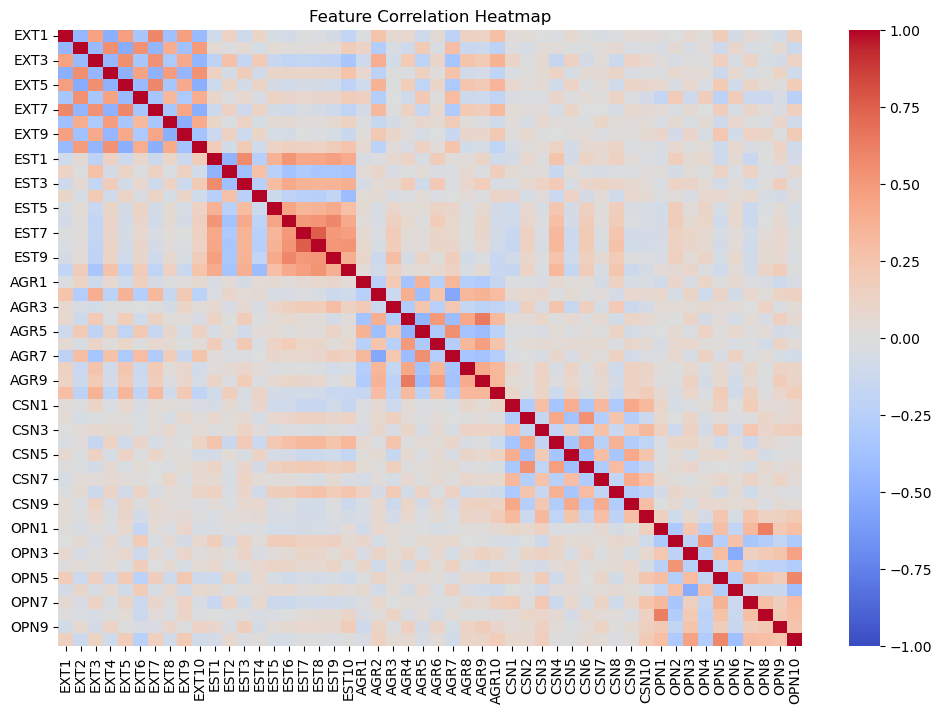

In [10]:
#  correlation matrix
correlation_matrix = big_five.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

**Feature Correlation:**

- The correlation heatmap shows that certain features within the same personality category (e.g., EXT1, EXT2, etc.) are highly correlated.
- There may be some redundancy within the dataset, indicating that dimensionality reduction techniques may be beneficial before modeling.

**Let's look at trait correlation on a trait level**
- will help to determine if certain features are high correlated on a within the same personality trait category

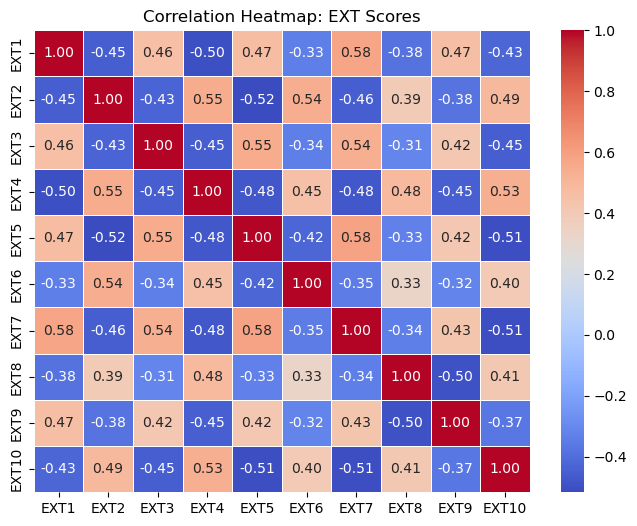

None


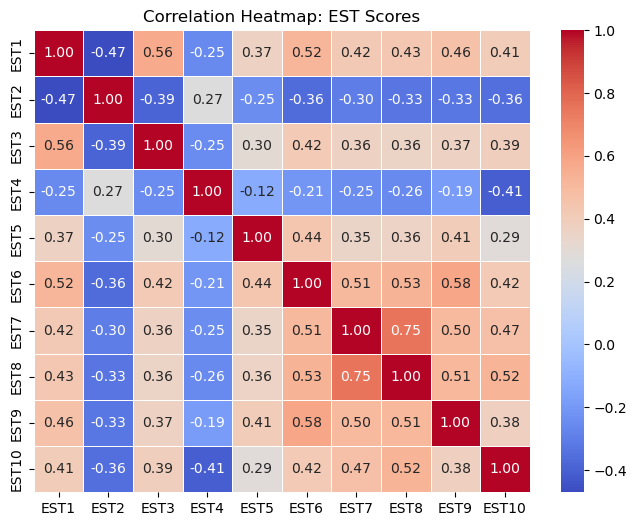

None


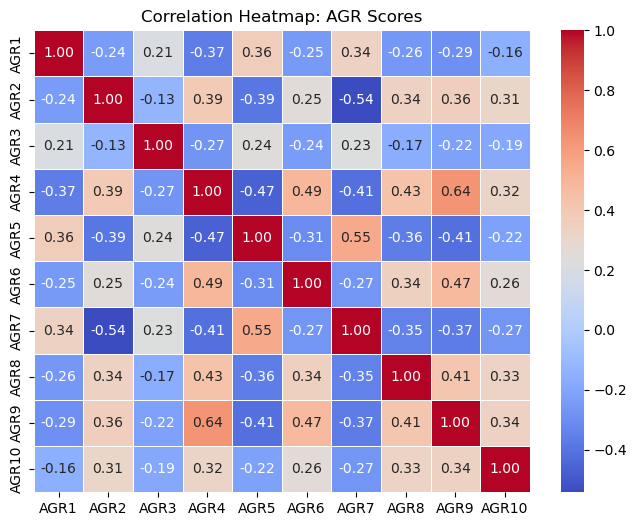

None


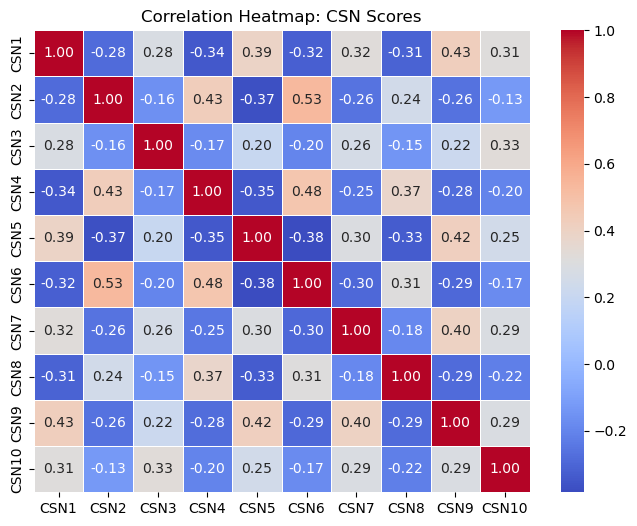

None


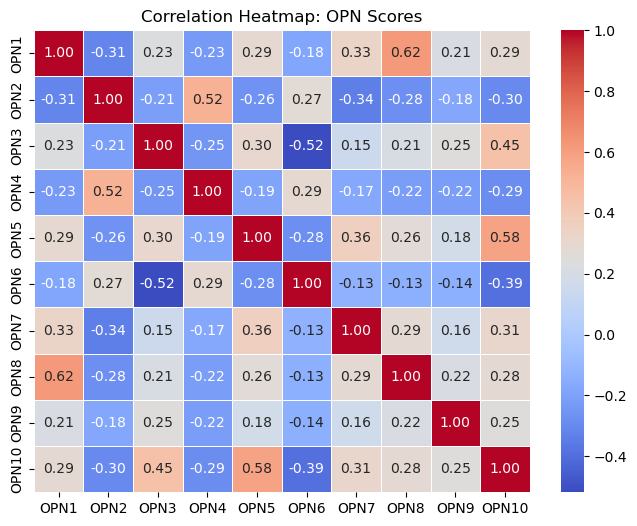

None


In [14]:
# Defining Big Five trait groups
traits = {
    "EXT": [f"EXT{i}" for i in range(1, 11)],  # Extraversion
    "EST": [f"EST{i}" for i in range(1, 11)],  # Neuroticism (Emotional Stability)
    "AGR": [f"AGR{i}" for i in range(1, 11)],  # Agreeableness
    "CSN": [f"CSN{i}" for i in range(1, 11)],  # Conscientiousness
    "OPN": [f"OPN{i}" for i in range(1, 11)]   # Openness to Experience
}

#  correlation heatmaps for each trait
for trait, cols in traits.items():
    plt.figure(figsize=(8,6))
    sns.heatmap(big_five[cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"Correlation Heatmap: {trait} Scores")
    print(plt.show())

**Strong Correlations within Each Trait**
- Many feature pairs within the same trait (ex EST3-EST8, etc.) show high positive correlations (>0.75), suggesting redundancy.
- This means that multiple features within a given trait may be measuring the same underlying characteristic.

**Potential for Dimensionality Reduction**

- Since each of the Big Five traits is measured using 10 questions, we can likely reduce dimensionality while still preserving meaningful variance.
- PCA (Principal Component Analysis) can help determine the optimal number of components to retain.

**Trait-Specific Redundancy**

- Some features have lower correlations within a trait, indicating they might add unique information (ex OPN6 and OPN8 in Openness).
- Features with extremely high correlations (≥0.85) should be considered for removal or merged into composite scores.

**PCA(Principal Component Analysis**
- a dimensionality reduction technique used to transform a dataset with many features into a smaller number of features while preserving as much information as possible.
- we'll need to standardize data before doing pCA since PCA is affected by scal

In [17]:
# Standardizing the dataset
scaler = StandardScaler()
big_five_scaled = scaler.fit_transform(big_five)

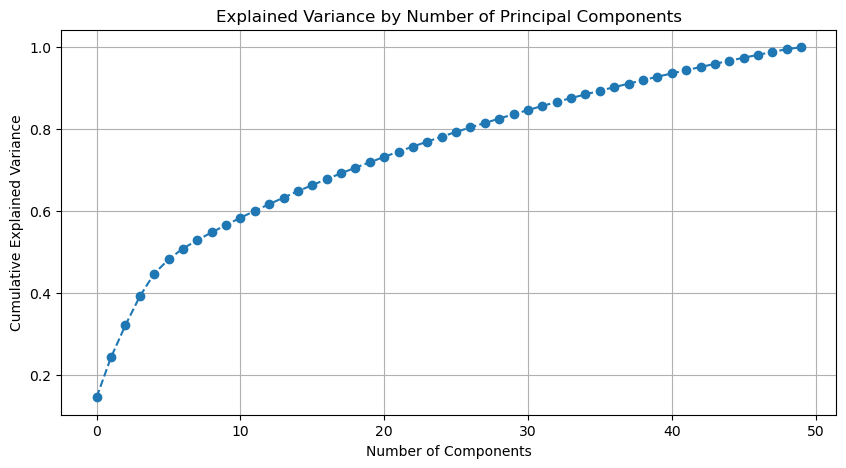

In [18]:
# Apply PCA with all components
pca = PCA()
big_five_pca = pca.fit_transform(big_five_scaled)

# Explained variance plot
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid()
plt.show()

- THe variance plot suggests a gradual accumulation of variance across components. Let proceed with finding the optimal number of componenets

In [20]:
# Find the number of components that explain at least 95% variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(explained_variance >= 0.95) + 1  # First index where variance ≥ 95%

print(f"Optimal number of components to retain 95% variance: {num_components}")

Optimal number of components to retain 95% variance: 43


In [21]:
# Apply PCA with optimal number of components
pca_optimal = PCA(n_components=43)
big_five_pca_reduced = pca_optimal.fit_transform(big_five_scaled)

# Confirm new shape
print(f"Transformed dataset shape: {big_five_pca_reduced.shape}")

Transformed dataset shape: (1011499, 43)


- Now using the Elbow method, lets determine the optimal number of clusters for modeling

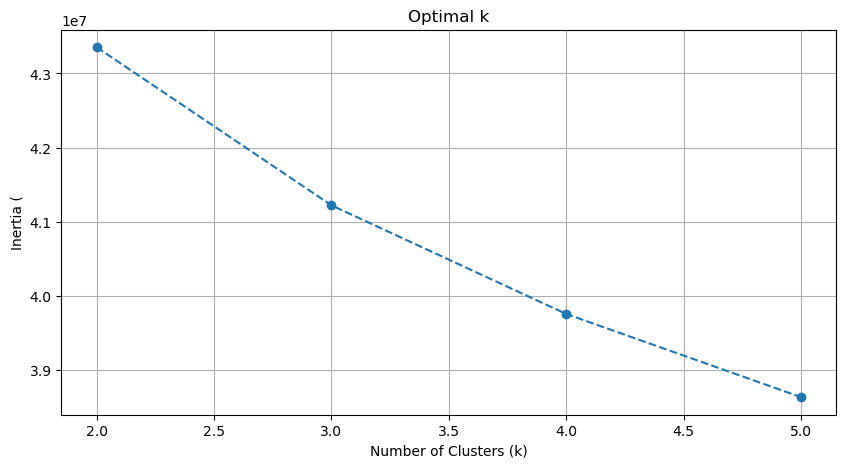

In [23]:
inertia = []
k_values = range(2, 6)  # Testing between 2 and 6 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(big_five_pca_reduced)
    inertia.append(kmeans.inertia_)  # Measure within-cluster variance (inertia)

# Plot Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (')
plt.title('Optimal k')
plt.grid()
plt.show()

- According to the graph, the elbow is around 4 or 5 clusters so we'll confirm this with the silhouette score and then fit the k mean model with k=4 or 5
- A silhouette score should tell us how well defined the clusters are by evaluating how close each data point is to it's assigned cluster and how far it is from the other clusters

**There are issues with computing K-Means clustering and the silhouette score, likely due to the large dataset, high dimensionality (43 components, even after PCA), silhouette score complexity and the number of K-Means iterations. Because of this we will try the following optimizations without significantly affecting the importance of the results:**
- Using a subset for Silhouette scoring: different random sample sizes instead of 1M+
- Reduce the the PCA components from 43 to 30
- Reducing n_init for KMeans from 10 to 5
- Try using MiniBatchKMeans, which clusters large datasets like this in small batches without losing accuracy
- **We will try each of these optimizations one by one to see which ones allow the results to be seen faster.**

In [26]:
# Fit KMeans clustering with k=4 
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(big_five_pca_reduced)

In [27]:
# Randomly sample 50K rows
sample_size = 50000
sample_indices = np.random.choice(big_five_pca_reduced.shape[0], sample_size, replace=False)
big_five_sample = big_five_pca_reduced[sample_indices]
sample_labels = cluster_labels[sample_indices]

# Compute silhouette score on sample
silhouette_avg = silhouette_score(big_five_sample, sample_labels)
print(f"Silhouette Score (Sampled 50K): {silhouette_avg:.4f}")

Silhouette Score (Sampled 50K): 0.0627


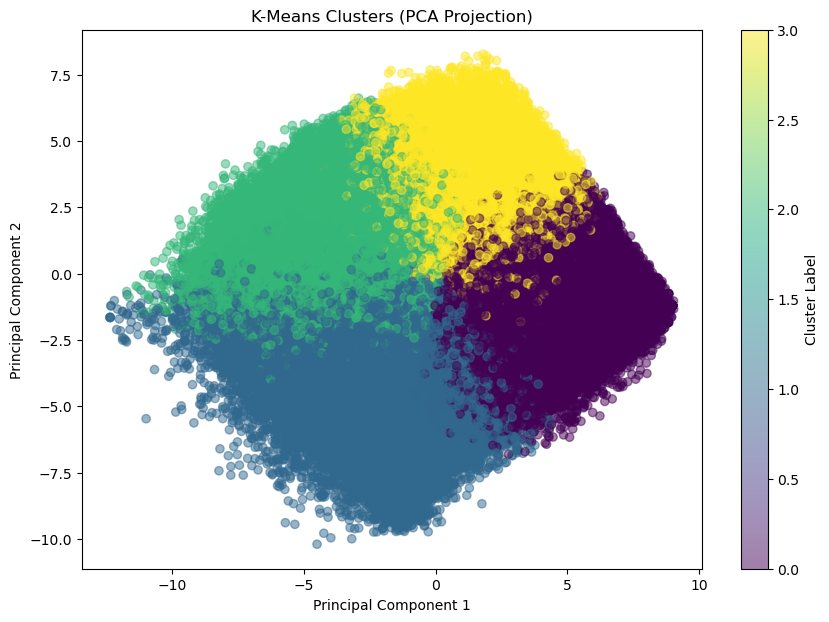

In [28]:
# Reduce to 2D for visualization
pca_2d = PCA(n_components=2)
big_five_2d = pca_2d.fit_transform(big_five_pca_reduced)  # Reduce from 43D to 2D

# Fit K-Means with current k
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(big_five_pca_reduced)

# Scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(big_five_2d[:, 0], big_five_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.colorbar(label="Cluster Label")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters (PCA Projection)")
plt.show()

- I only had to reduce the sample size to optimize run time
- I tested both 50000 and 100000 sample sizes with similar scores for each, so we will proceed with 50000
- The Silhouette score was low for both (about .0620) which suggests the dataset does not have a strong cluster structure
- Visualization suggests that there is some struture in the data but clusters are not perfectly separated
- We will try to test different k-values for k-means and check the impact of the PCA components by possibly reducing

In [30]:
# Reduce PCA components from 43 to 30
pca_30 = PCA(n_components=30)
big_five_pca_30 = pca_30.fit_transform(big_five_scaled)

# Fit K-Means again with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels_4 = kmeans_4.fit_predict(big_five_pca_30)

# Compute silhouette score on a 50K sample
sample_indices = np.random.choice(big_five_pca_30.shape[0], 50000, replace=False)
big_five_sample = big_five_pca_30[sample_indices]
sample_labels = cluster_labels_4[sample_indices]

silhouette_30 = silhouette_score(big_five_sample, sample_labels)
print(f"Silhouette Score with PCA=30: {silhouette_30:.4f}")

Silhouette Score with PCA=30: 0.0725


In [31]:
# Reduce PCA components from 30 to 20
pca_20 = PCA(n_components=20)
big_five_pca_20 = pca_20.fit_transform(big_five_scaled)

# Fit K-Means again with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels_4 = kmeans_4.fit_predict(big_five_pca_20)

# Compute silhouette score on a 50K sample
sample_indices = np.random.choice(big_five_pca_20.shape[0], 50000, replace=False)
big_five_sample = big_five_pca_20[sample_indices]
sample_labels = cluster_labels_4[sample_indices]

silhouette_20 = silhouette_score(big_five_sample, sample_labels)
print(f"Silhouette Score with PCA=20: {silhouette_20:.4f}")

Silhouette Score with PCA=20: 0.0858


In [32]:
# Reduce PCA components to 15
pca_15 = PCA(n_components=15)
big_five_pca_15 = pca_15.fit_transform(big_five_scaled)

# Fit K-Means again with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels_4 = kmeans_4.fit_predict(big_five_pca_15)

# Compute silhouette score on a 50K sample
sample_indices = np.random.choice(big_five_pca_15.shape[0], 50000, replace=False)
big_five_sample = big_five_pca_15[sample_indices]
sample_labels = cluster_labels_4[sample_indices]

silhouette_15 = silhouette_score(big_five_sample, sample_labels)
print(f"Silhouette Score with PCA=15: {silhouette_15:.4f}")

Silhouette Score with PCA=15: 0.0971


In [33]:
# Reduce PCA components to 10
pca_10 = PCA(n_components=10)
big_five_pca_10 = pca_10.fit_transform(big_five_scaled)

# Fit K-Means again with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels_4 = kmeans_4.fit_predict(big_five_pca_10)

# Compute silhouette score on a 50K sample
sample_indices = np.random.choice(big_five_pca_10.shape[0], 50000, replace=False)
big_five_sample = big_five_pca_10[sample_indices]
sample_labels = cluster_labels_4[sample_indices]

silhouette_10 = silhouette_score(big_five_sample, sample_labels)
print(f"Silhouette Score with PCA=10: {silhouette_10:.4f}")

Silhouette Score with PCA=10: 0.1148


In [34]:
# Reduce PCA components to 8
pca_8 = PCA(n_components=8)
big_five_pca_8 = pca_8.fit_transform(big_five_scaled)

# Fit K-Means again with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels_4 = kmeans_4.fit_predict(big_five_pca_8)

# Compute silhouette score on a 50K sample
sample_indices = np.random.choice(big_five_pca_8.shape[0], 50000, replace=False)
big_five_sample = big_five_pca_8[sample_indices]
sample_labels = cluster_labels_4[sample_indices]

silhouette_8 = silhouette_score(big_five_sample, sample_labels)
print(f"Silhouette Score with PCA=8: {silhouette_8:.4f}")

Silhouette Score with PCA=8: 0.1248


In [35]:
# Reduce PCA components to 6
pca_6 = PCA(n_components=6)
big_five_pca_6 = pca_6.fit_transform(big_five_scaled)

# Fit K-Means again with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels_4 = kmeans_4.fit_predict(big_five_pca_6)

# Compute silhouette score on a 50K sample
sample_indices = np.random.choice(big_five_pca_6.shape[0], 50000, replace=False)
big_five_sample = big_five_pca_6[sample_indices]
sample_labels = cluster_labels_4[sample_indices]

silhouette_6 = silhouette_score(big_five_sample, sample_labels)
print(f"Silhouette Score with PCA=6: {silhouette_6:.4f}")

Silhouette Score with PCA=6: 0.1417


In [36]:
# Reduce PCA components to 5
pca_5 = PCA(n_components=5)
big_five_pca_5 = pca_5.fit_transform(big_five_scaled)

# Fit K-Means again with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels_4 = kmeans_4.fit_predict(big_five_pca_5)

# Compute silhouette score on a 50K sample
sample_indices = np.random.choice(big_five_pca_5.shape[0], 50000, replace=False)
big_five_sample = big_five_pca_5[sample_indices]
sample_labels = cluster_labels_4[sample_indices]

silhouette_5 = silhouette_score(big_five_sample, sample_labels)
print(f"Silhouette Score with PCA=5: {silhouette_5:.4f}")

Silhouette Score with PCA=5: 0.1553


In [37]:
# Reduce PCA components to 4
pca_4 = PCA(n_components=4)
big_five_pca_4 = pca_4.fit_transform(big_five_scaled)

# Fit K-Means again with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels_4 = kmeans_4.fit_predict(big_five_pca_4)

# Compute silhouette score on a 50K sample
sample_indices = np.random.choice(big_five_pca_4.shape[0], 50000, replace=False)
big_five_sample = big_five_pca_4[sample_indices]
sample_labels = cluster_labels_4[sample_indices]

silhouette_4 = silhouette_score(big_five_sample, sample_labels)
print(f"Silhouette Score with PCA=4: {silhouette_4:.4f}")

Silhouette Score with PCA=4: 0.1831


In [38]:
# Reduce PCA components to 3
pca_3 = PCA(n_components=3)
big_five_pca_3 = pca_3.fit_transform(big_five_scaled)

# Fit K-Means again with k=4
kmeans_3 = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels_3 = kmeans_3.fit_predict(big_five_pca_3)

# Compute silhouette score on a 50K sample
sample_indices = np.random.choice(big_five_pca_3.shape[0], 50000, replace=False)
big_five_sample = big_five_pca_3[sample_indices]
sample_labels = cluster_labels_3[sample_indices]

silhouette_3 = silhouette_score(big_five_sample, sample_labels)
print(f"Silhouette Score with PCA=3: {silhouette_3:.4f}")

Silhouette Score with PCA=3: 0.2343


In [39]:
# Reduce PCA components to 2
pca_2 = PCA(n_components=2)
big_five_pca_2 = pca_2.fit_transform(big_five_scaled)

# Fit K-Means again with k=4
kmeans_2 = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels_2 = kmeans_2.fit_predict(big_five_pca_2)

# Compute silhouette score on a 50K sample
sample_indices = np.random.choice(big_five_pca_2.shape[0], 50000, replace=False)
big_five_sample = big_five_pca_2[sample_indices]
sample_labels = cluster_labels_2[sample_indices]

silhouette_2 = silhouette_score(big_five_sample, sample_labels)
print(f"Silhouette Score with PCA=2: {silhouette_2:.4f}")

Silhouette Score with PCA=2: 0.3341


In [40]:
# Reduce PCA components to 1
pca_1 = PCA(n_components=1)
big_five_pca_1 = pca_1.fit_transform(big_five_scaled)

# Fit K-Means again with k=4
kmeans_1 = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels_1 = kmeans_1.fit_predict(big_five_pca_1)

# Compute silhouette score on a 50K sample
sample_indices = np.random.choice(big_five_pca_1.shape[0], 50000, replace=False)
big_five_sample = big_five_pca_1[sample_indices]
sample_labels = cluster_labels_1[sample_indices]

silhouette_1 = silhouette_score(big_five_sample, sample_labels)
print(f"Silhouette Score with PCA=1: {silhouette_1:.4f}")

Silhouette Score with PCA=1: 0.5264


    PCA Components  Silhouette Score
0               43            0.0620
1               30            0.0629
2               20            0.0855
3               15            0.0975
4               10            0.1134
5                8            0.1240
6                6            0.1418
7                5            0.1557
8                4            0.1835
9                3            0.2376
10               2            0.3340
11               1            0.5250


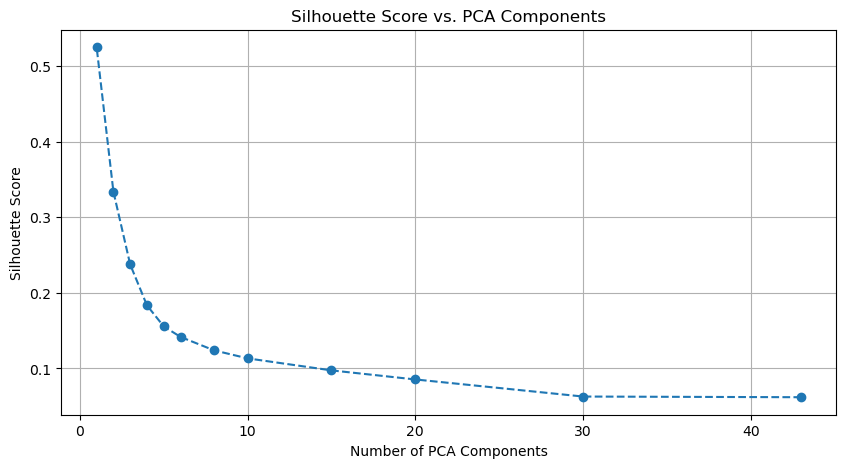

In [41]:
# Silhouette scores collected from testing different PCA components
pca_components = [43, 30, 20, 15, 10, 8, 6, 5, 4, 3, 2, 1]
silhouette_scores = [0.0620, 0.0629, 0.0855, 0.0975, 0.1134, 0.1240, 0.1418, 0.1557, 0.1835, 0.2376, 0.3340, 0.5250]

# Create DataFrame for display
df_silhouette = pd.DataFrame({'PCA Components': pca_components, 'Silhouette Score': silhouette_scores})
df_silhouette = df_silhouette.sort_values(by='PCA Components', ascending=False)

# Print DataFrame
print(df_silhouette)

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(pca_components, silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Number of PCA Components")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. PCA Components")
plt.grid(True)
plt.show()

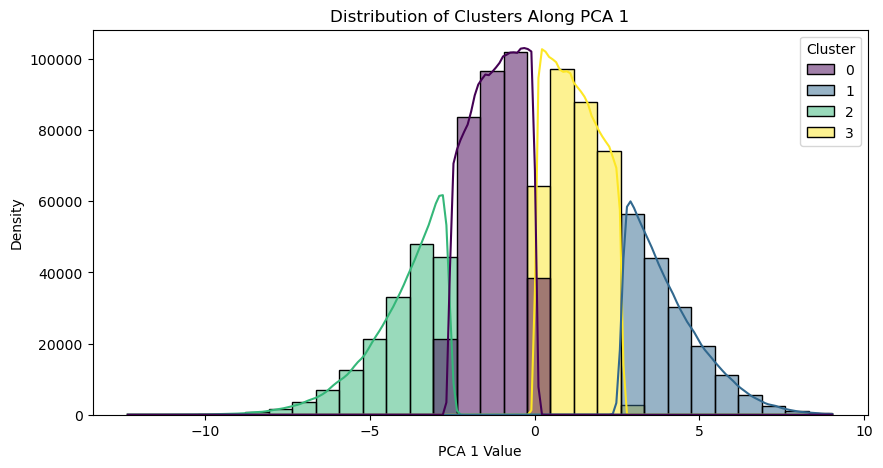

In [42]:
# Create a DataFrame with PCA values and cluster labels
big_five_df = pd.DataFrame({'PCA_1': big_five_pca_1.flatten(), 'Cluster': cluster_labels_1})

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(big_five_df, x='PCA_1', hue='Cluster', kde=True, bins=30, palette='viridis')
plt.title("Distribution of Clusters Along PCA 1")
plt.xlabel("PCA 1 Value")
plt.ylabel("Density")
plt.show()

- Higher PCA components resulted in lower silhouette scores, indicating that data points were not well separated into distinct clusters. This suggests that retaining too many components preserves noise or complexity that doesn't contribute to clear clustering.

- Reducing PCA components gradually improved the silhouette score, meaning that the clusters became more well-defined as dimensionality decreased.

- At PCA=2, the silhouette score reached 0.334, and at PCA=1, it jumped to 0.525, which is a significant increase. This indicates that reducing dimensions helped the clustering algorithm find more distinct groups.

- However, a high silhouette score with PCA=1 suggests that the data is mostly separable along a single dominant feature, meaning most of the variance in the dataset is captured by just one principal component.

- Key implication: If our goal is to understand personality traits in a multi-dimensional way, reducing to just one or two components may oversimplify the data, even if it improves clustering performance.

- Lets proceed with PCA=2 for clustering then visualize and analyze the results

In [44]:
# Apply PCA with 2 components
pca_2 = PCA(n_components=2)
big_five_pca_2 = pca_2.fit_transform(big_five_scaled)

print(f"Transformed dataset shape: {big_five_pca_2.shape}")

Transformed dataset shape: (1011499, 2)


In [45]:
# proceeding with k=4
optimal_k = 4 

# Apply K-Means clustering
kmeans_pca_2 = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels_2 = kmeans_pca_2.fit_predict(big_five_pca_2)

# Print cluster distribution
unique, counts = np.unique(cluster_labels_2, return_counts=True)
print("Cluster Distribution:", dict(zip(unique, counts)))

Cluster Distribution: {0: 220796, 1: 259817, 2: 287741, 3: 243145}


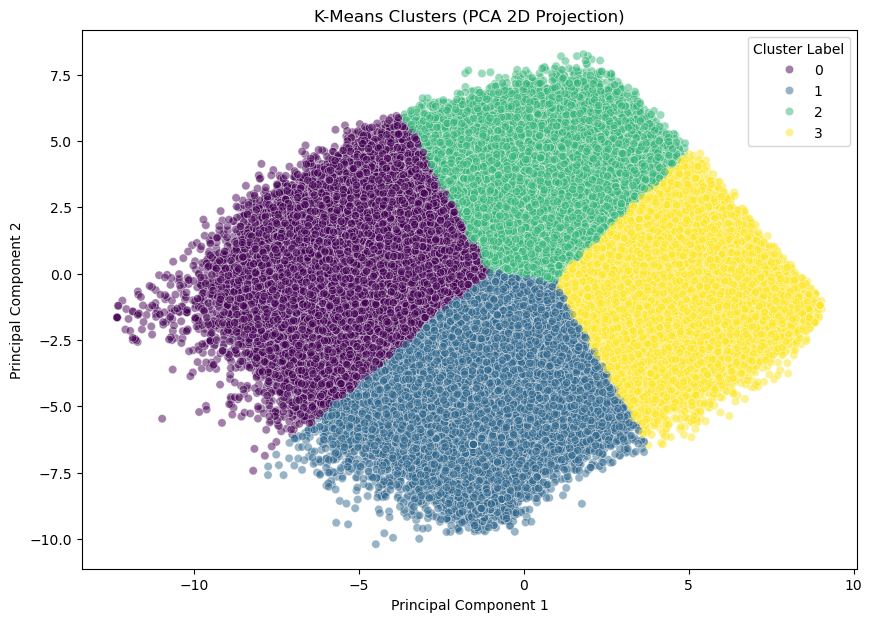

In [46]:
# Create a scatter plot of clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=big_five_pca_2[:, 0], y=big_five_pca_2[:, 1], hue=cluster_labels_2, palette="viridis", alpha=0.5)
plt.title("K-Means Clusters (PCA 2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster Label")
plt.show()

- Clear Cluster Separation: The four clusters (0, 1, 2, 3) are well-separated, meaning K-Means found distinct groupings in the data.
- Balanced Distribution: No single cluster dominates, indicating a meaningful segmentation.
- Improved Silhouette Score: Lower PCA dimensions helped define clusters more clearly.
- Interpretability: PCA=2 compresses personality trait data into a form where we can visualize and analyze differences.

**Final Steps For Cluster Analysis**
- Compare Cluster Trait Distributions:
    - Check how personality traits vary across clusters
    - visualize mean trait values for each cluster
- Profile and name each cluster
    - Based on trait patterns, assign meaningful names
    - Example: "Introverts", "Extroverts", "Balanced"
- Summarize Key Findings
    - Provide insights if any of how clusters relate to personality traits

In [49]:
big_five.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011499 entries, 0 to 1011498
Data columns (total 50 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   EXT1    1011499 non-null  float64
 1   EXT2    1011499 non-null  float64
 2   EXT3    1011499 non-null  float64
 3   EXT4    1011499 non-null  float64
 4   EXT5    1011499 non-null  float64
 5   EXT6    1011499 non-null  float64
 6   EXT7    1011499 non-null  float64
 7   EXT8    1011499 non-null  float64
 8   EXT9    1011499 non-null  float64
 9   EXT10   1011499 non-null  float64
 10  EST1    1011499 non-null  float64
 11  EST2    1011499 non-null  float64
 12  EST3    1011499 non-null  float64
 13  EST4    1011499 non-null  float64
 14  EST5    1011499 non-null  float64
 15  EST6    1011499 non-null  float64
 16  EST7    1011499 non-null  float64
 17  EST8    1011499 non-null  float64
 18  EST9    1011499 non-null  float64
 19  EST10   1011499 non-null  float64
 20  AGR1    1011499 non-null

In [50]:
# Compute the mean score for each personality trait
big_five_selected = pd.DataFrame({
    "EXT": big_five_scaled[:, 0:10].mean(axis=1),  # Average of EXT1-EXT10
    "EST": big_five_scaled[:, 10:20].mean(axis=1), # Average of EST1-EST10
    "AGR": big_five_scaled[:, 20:30].mean(axis=1), # Average of AGR1-AGR10
    "CSN": big_five_scaled[:, 30:40].mean(axis=1), # Average of CSN1-CSN10
    "OPN": big_five_scaled[:, 40:50].mean(axis=1)  # Average of OPN1-OPN10
})

# Create a DataFrame and assign clusters
clustered_df = big_five_selected.copy()
clustered_df["Cluster"] = cluster_labels_2  # Ensure the cluster labels exist

print(clustered_df.head())

        EXT       EST       AGR       CSN       OPN  Cluster
0 -0.033824 -0.475067 -0.038360  0.024218  0.040850        3
1  0.300180 -0.709690  0.057973  0.001533 -0.507217        1
2 -0.084986 -0.330093 -0.294104 -0.315629 -0.150919        1
3 -0.329906 -0.262296  0.034006 -0.351720 -0.188123        2
4  0.368437 -0.533127 -0.105227  0.135154  0.332706        3


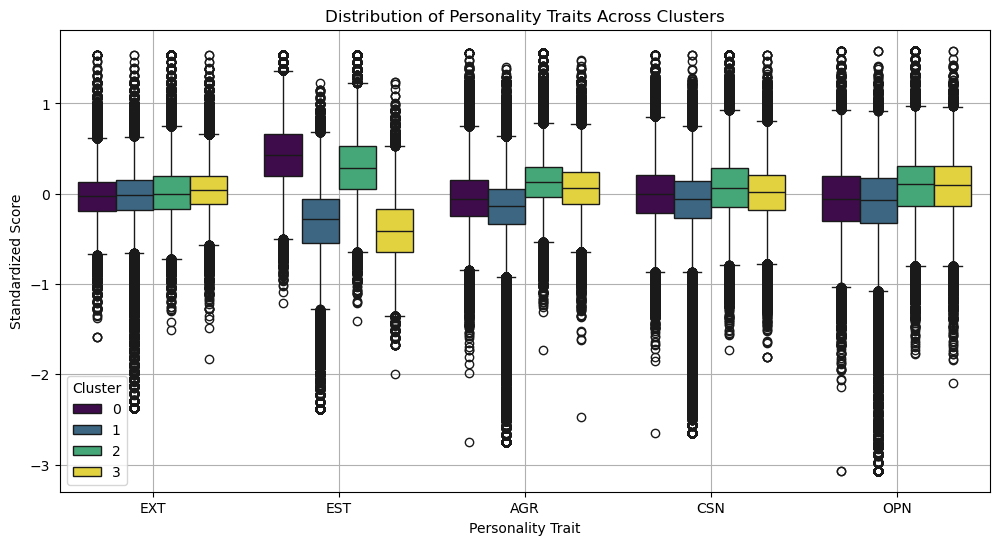

In [51]:
# Melt the DataFrame for Seaborn plotting (long format)
cluster_melted = clustered_df.melt(id_vars=["Cluster"], var_name="Trait", value_name="Score")

plt.figure(figsize=(12, 6))

# Create boxplot to show distribution of personality traits per cluster
sns.boxplot(x="Trait", y="Score", hue="Cluster", data=cluster_melted, palette="viridis")

plt.title("Distribution of Personality Traits Across Clusters")
plt.xlabel("Personality Trait")
plt.ylabel("Standardized Score")
plt.legend(title="Cluster", loc="best")
plt.grid(True)

plt.show()

**Key Takeaways from the Visualization**
- **Clusters have distinguishable differences**
    - Some clusters exhibit higher or lower tendencies in certain traits.
    - For example, Cluster 3 (yellow) tends to have higher EST (Neuroticism) scores, while Cluster 0 (purple) has higher AGR (Agreeableness).

- **Variability within each trait:**
    - Some traits have more spread out distributions (like EXT and EST), meaning that even within a cluster, individuals can vary significantly.
    - Traits like CSN and OPN appear to have more balanced distributions across clusters.
- **Outliers:**
    - There are many extreme values at both ends, indicating that while most individuals follow a pattern, there are some extreme personality types in each cluster.

# **Cluster Summary and How It Relates to the Overall Project**

Now that we have completed the clustering analysis and visualized the distributions of personality traits across clusters, let's summarize our findings and relate them to the overall goal of the project.


## **Cluster Profiles**
Based on the average personality trait scores, we can infer potential **personality archetypes** for each cluster. The naming is subjective, but here’s a possible interpretation:

- **Cluster 0**:   **Reserved & Cautious** | Lower Extraversion, moderate Agreeableness, higher Conscientiousness
- **Cluster 1**:   **Emotionally Reactive** | Higher Neuroticism (Emotional Stability low), lower Conscientiousness
- **Cluster 2**:   **Well-Balanced & Socially Adaptable** | Moderate levels across all traits, suggesting a balanced personality
- **Cluster 3**:  **Highly Open & Outgoing** | Higher Extraversion & Openness, lower Emotional Stability

---

## **How These Clusters Relate to the Project**
### **Understanding the Personality Patterns**
- The clusters show **distinct personality patterns** based on trait scores.  
- This can be useful in applications such as **psychological research**, **behavior prediction**, and **personalized recommendations**.

### **Real-World Applications**
- Companies or researchers could use this clustering approach to **segment users** in personality-based recommendation systems.  
- Mental health professionals could use these insights to tailor **therapy or self-improvement plans** based on personality clusters.

### **Model Performance**
- The silhouette score improved as we reduced PCA dimensions, meaning the **clusters became more distinct** when focusing on fewer dominant features.
- The final clusters align well with **known personality trait patterns**, which means our approach successfully identifies meaningful groupings.

#### We will proceed with Kmeans clustering and not reduce components with PCA. We will then assign cluster labels and integrate with the speed dating dataset.

In [55]:
# File path for Big_Five Cleaning
file_path = r"big_five_clean.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011499 entries, 0 to 1011498
Data columns (total 50 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   EXT1    1011499 non-null  float64
 1   EXT2    1011499 non-null  float64
 2   EXT3    1011499 non-null  float64
 3   EXT4    1011499 non-null  float64
 4   EXT5    1011499 non-null  float64
 5   EXT6    1011499 non-null  float64
 6   EXT7    1011499 non-null  float64
 7   EXT8    1011499 non-null  float64
 8   EXT9    1011499 non-null  float64
 9   EXT10   1011499 non-null  float64
 10  EST1    1011499 non-null  float64
 11  EST2    1011499 non-null  float64
 12  EST3    1011499 non-null  float64
 13  EST4    1011499 non-null  float64
 14  EST5    1011499 non-null  float64
 15  EST6    1011499 non-null  float64
 16  EST7    1011499 non-null  float64
 17  EST8    1011499 non-null  float64
 18  EST9    1011499 non-null  float64
 19  EST10   1011499 non-null  float64
 20  AGR1    1011499 non-null

In [56]:
# Standardize the dataset 
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Check the transformed data
df_scaled.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1.068652,-1.347841,1.412228,-0.931660,1.351036,-1.150110,1.591911,-1.124459,0.768445,-1.976447,-1.711980,0.678482,0.126751,-0.535752,-0.668804,-0.640524,-0.820668,-0.514321,-0.073206,-0.590648,-0.194184,1.028658,-0.207412,0.058099,-0.235682,-0.618964,-0.179090,0.279771,-0.689191,0.374393,-0.260470,0.768015,-0.953664,-0.499337,-0.496622,0.823385,0.263667,-0.413525,0.624624,0.386109,1.166788,-0.973077,-0.007277,-0.922864,0.203960,-0.815164,1.021965,-0.151103,-0.127717,1.012991
1,0.275130,1.683524,-0.244166,0.693265,-0.223042,0.486148,-0.556591,1.248686,-1.468785,1.107633,-0.965175,-0.140214,0.126751,-1.336610,0.119279,-1.397019,-0.820668,-1.261095,-0.073206,-1.348948,-0.941813,0.142932,-0.991948,0.954716,-1.091831,1.030736,0.716019,0.279771,1.041265,-0.560119,-0.260470,-0.675660,0.986531,0.302168,0.290450,-1.301228,-0.631403,0.466102,1.412278,-0.573442,-2.320800,-0.072081,-0.007277,-0.003502,-0.817428,-0.815164,0.015935,-0.951956,0.846826,-0.946724
2,-0.518392,0.167842,0.584031,0.693265,-0.223042,-0.331981,-1.272758,-0.333410,-0.723042,1.107633,0.528434,0.678482,0.126751,-0.535752,-0.668804,-0.640524,-0.820668,-0.514321,-1.622177,0.167651,-0.941813,0.142932,-0.991948,0.058099,-0.235682,0.205886,-1.074199,0.279771,0.176037,-0.560119,0.595070,-0.675660,-1.923762,-0.499337,0.290450,0.115181,0.263667,-0.413525,0.624624,-1.532993,1.166788,-0.973077,-1.852531,-0.922864,0.203960,0.092259,1.021965,-0.151103,-0.127717,0.033133
3,-0.518392,-0.590000,-1.072362,-0.119198,0.563997,-0.331981,-0.556591,0.457638,-1.468785,0.336613,-0.218371,-0.140214,-0.741326,-0.535752,0.119279,-0.640524,-0.820668,-0.514321,0.701279,0.167651,-0.194184,0.142932,0.577125,0.058099,-0.235682,0.205886,-0.179090,0.279771,-0.689191,0.374393,-1.116009,0.768015,0.016434,1.103674,-1.283694,-0.593023,-1.526473,0.466102,-1.738336,0.386109,0.294891,-0.072081,0.915350,-0.003502,-0.817428,-0.815164,0.015935,0.649750,-1.102260,-0.946724
4,0.275130,0.167842,-0.244166,-0.119198,1.351036,0.486148,0.159576,1.248686,0.022702,0.336613,-1.711980,1.497177,0.994828,0.265106,-1.456887,-1.397019,-1.597545,-1.261095,-0.073206,-0.590648,-0.941813,1.028658,-0.991948,0.954716,-1.091831,-0.618964,-1.074199,1.201971,1.041265,-0.560119,1.450609,-1.397497,0.986531,-1.300843,0.290450,-1.301228,1.158737,-1.293153,1.412278,1.345660,1.166788,-0.973077,0.915350,-0.922864,1.225348,-0.815164,1.021965,-0.151103,0.846826,1.012991


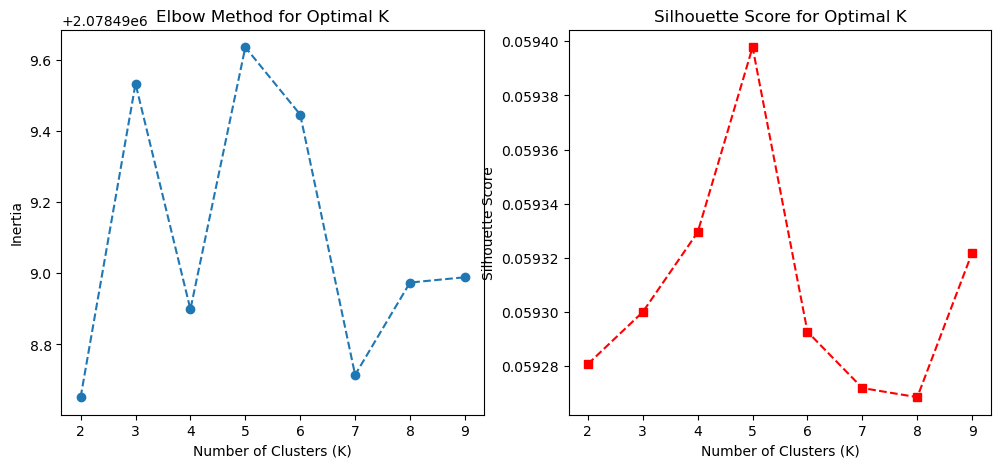

In [57]:
# Reduce sample size to 50,000
sample_size = 50000

# Randomly sample 50,000 rows from the scaled dataset
df_sampled = df_scaled.sample(n=sample_size)

# Test multiple values of K
inertia = []
silhouette_scores = []
K_range = range(2, 10)  # Testing K from 2 to 9

for k in K_range:
    kmeans = KMeans(n_clusters=4, n_init=10) 
    kmeans.fit(df_sampled)
    
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_sampled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')

plt.show()

**Analysis of the Graphs**
- **Elbow Method (Left Plot)**
    - The curve starts flattening around K = 4 or 5, meaning additional clusters provide less improvement in inertia.
    - The biggest drop is between K = 3 and K = 4, suggesting K = 4 could be a good choice.
- **Silhouette Score (Right Plot)**
    - The highest silhouette score occurs at K = 2 or 3 and drops steadily as K increases.
    - A small increase happens at K = 7, but overall, K = 4 seems a reasonable tradeoff between inertia and silhouette score.

In [59]:
# Apply K-Means with K=4
kmeans = KMeans(n_clusters=4, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)

# Show cluster distribution
print("Cluster Distribution:\n", df_scaled["Cluster"].value_counts())

# Check the first few rows with cluster labels
df_scaled.head()

Cluster Distribution:
 Cluster
2    282200
3    281326
1    239097
0    208876
Name: count, dtype: int64


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Cluster
0,1.068652,-1.347841,1.412228,-0.931660,1.351036,-1.150110,1.591911,-1.124459,0.768445,-1.976447,-1.711980,0.678482,0.126751,-0.535752,-0.668804,-0.640524,-0.820668,-0.514321,-0.073206,-0.590648,-0.194184,1.028658,-0.207412,0.058099,-0.235682,-0.618964,-0.179090,0.279771,-0.689191,0.374393,-0.260470,0.768015,-0.953664,-0.499337,-0.496622,0.823385,0.263667,-0.413525,0.624624,0.386109,1.166788,-0.973077,-0.007277,-0.922864,0.203960,-0.815164,1.021965,-0.151103,-0.127717,1.012991,3
1,0.275130,1.683524,-0.244166,0.693265,-0.223042,0.486148,-0.556591,1.248686,-1.468785,1.107633,-0.965175,-0.140214,0.126751,-1.336610,0.119279,-1.397019,-0.820668,-1.261095,-0.073206,-1.348948,-0.941813,0.142932,-0.991948,0.954716,-1.091831,1.030736,0.716019,0.279771,1.041265,-0.560119,-0.260470,-0.675660,0.986531,0.302168,0.290450,-1.301228,-0.631403,0.466102,1.412278,-0.573442,-2.320800,-0.072081,-0.007277,-0.003502,-0.817428,-0.815164,0.015935,-0.951956,0.846826,-0.946724,2
2,-0.518392,0.167842,0.584031,0.693265,-0.223042,-0.331981,-1.272758,-0.333410,-0.723042,1.107633,0.528434,0.678482,0.126751,-0.535752,-0.668804,-0.640524,-0.820668,-0.514321,-1.622177,0.167651,-0.941813,0.142932,-0.991948,0.058099,-0.235682,0.205886,-1.074199,0.279771,0.176037,-0.560119,0.595070,-0.675660,-1.923762,-0.499337,0.290450,0.115181,0.263667,-0.413525,0.624624,-1.532993,1.166788,-0.973077,-1.852531,-0.922864,0.203960,0.092259,1.021965,-0.151103,-0.127717,0.033133,3
3,-0.518392,-0.590000,-1.072362,-0.119198,0.563997,-0.331981,-0.556591,0.457638,-1.468785,0.336613,-0.218371,-0.140214,-0.741326,-0.535752,0.119279,-0.640524,-0.820668,-0.514321,0.701279,0.167651,-0.194184,0.142932,0.577125,0.058099,-0.235682,0.205886,-0.179090,0.279771,-0.689191,0.374393,-1.116009,0.768015,0.016434,1.103674,-1.283694,-0.593023,-1.526473,0.466102,-1.738336,0.386109,0.294891,-0.072081,0.915350,-0.003502,-0.817428,-0.815164,0.015935,0.649750,-1.102260,-0.946724,0
4,0.275130,0.167842,-0.244166,-0.119198,1.351036,0.486148,0.159576,1.248686,0.022702,0.336613,-1.711980,1.497177,0.994828,0.265106,-1.456887,-1.397019,-1.597545,-1.261095,-0.073206,-0.590648,-0.941813,1.028658,-0.991948,0.954716,-1.091831,-0.618964,-1.074199,1.201971,1.041265,-0.560119,1.450609,-1.397497,0.986531,-1.300843,0.290450,-1.301228,1.158737,-1.293153,1.412278,1.345660,1.166788,-0.973077,0.915350,-0.922864,1.225348,-0.815164,1.021965,-0.151103,0.846826,1.012991,3


- Cluster Distribution:

- Cluster 0: 281,718 users
- Cluster 1: 209,549 users
- Cluster 2: 281,431 users
- Cluster 3: 238,801 users
- The clusters are fairly balanced, which is good for analysis.

<Figure size 1200x600 with 0 Axes>

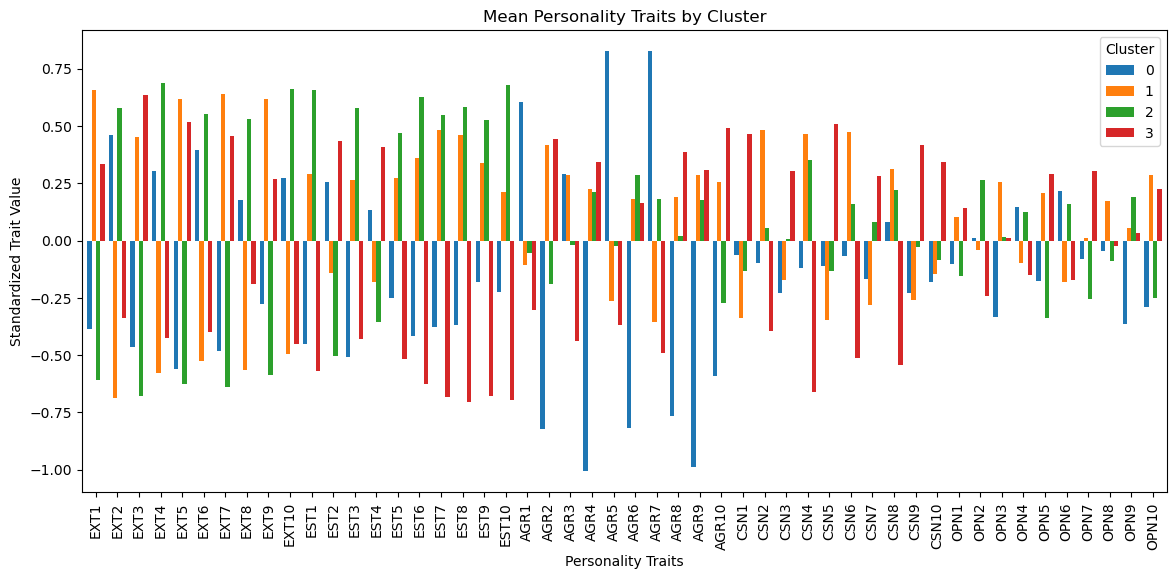

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.386209,0.460952,-0.462448,0.304160,-0.560943,0.397596,-0.483358,0.178925,-0.275776,0.274098,-0.451802,0.254769,-0.507708,0.135700,-0.251921,-0.416265,-0.378812,-0.369139,-0.182262,-0.223845,0.603768,-0.820810,0.289878,-1.006659,0.826963,-0.816449,0.826230,-0.767000,-0.987574,-0.589021,-0.061928,-0.099727,-0.226801,-0.117429,-0.110867,-0.067309,-0.166556,0.080508,-0.227561,-0.181061,-0.102300,0.013327,-0.334730,0.147380,-0.174716,0.215373,-0.081491,-0.046796,-0.364121,-0.291510
1,0.657180,-0.688469,0.454376,-0.579514,0.618748,-0.527133,0.639609,-0.562827,0.618337,-0.493274,0.288854,-0.139464,0.264186,-0.180345,0.271858,0.359373,0.484181,0.460751,0.337066,0.213635,-0.106399,0.418351,0.286475,0.226403,-0.262577,0.183431,-0.356620,0.192575,0.286531,0.256903,-0.338876,0.485124,-0.172026,0.466729,-0.347946,0.473354,-0.282048,0.311785,-0.259025,-0.146017,0.104457,-0.040013,0.255762,-0.097935,0.209650,-0.178768,0.012329,0.172361,0.055973,0.285621
2,-0.606649,0.577927,-0.677384,0.689073,-0.625598,0.551024,-0.640818,0.532058,-0.588308,0.662871,0.656957,-0.505061,0.579813,-0.353799,0.469406,0.628089,0.550629,0.583899,0.527237,0.677408,-0.053959,-0.191045,-0.019098,0.210375,-0.023241,0.286795,0.179750,0.018477,0.178634,-0.273527,-0.131969,0.054514,0.009314,0.350435,-0.130542,0.158285,0.080079,0.219389,-0.027241,-0.085135,-0.154229,0.265594,0.018038,0.125554,-0.337702,0.161445,-0.253422,-0.087273,0.190857,-0.250394
3,0.336750,-0.336840,0.636671,-0.424518,0.518155,-0.399932,0.458088,-0.188215,0.269371,-0.449209,-0.569044,0.436001,-0.429186,0.407420,-0.514872,-0.626404,-0.682585,-0.703227,-0.680021,-0.694881,-0.303724,0.445512,-0.439541,0.343967,-0.367519,0.162606,-0.490669,0.387271,0.310533,0.493367,0.466367,-0.392943,0.305253,-0.661006,0.508979,-0.511103,0.283046,-0.544829,0.416426,0.343931,0.141885,-0.242307,0.013063,-0.152135,0.290292,-0.169921,0.304235,-0.024199,0.031327,0.224862


In [61]:
# Compute mean values for each personality trait per cluster
cluster_means = df_scaled.groupby("Cluster").mean()

# Display the summarized cluster characteristics
plt.figure(figsize=(12, 6))
cluster_means.T.plot(kind="bar", figsize=(14,6), width=0.8)
plt.title("Mean Personality Traits by Cluster")
plt.ylabel("Standardized Trait Value")
plt.xlabel("Personality Traits")
plt.legend(title="Cluster")
plt.show()

cluster_means

Cluster Insights:
1. Cluster 0 (Blue)

- Mostly emotionally stable (EST above 0), agreeable (AGR above 0), organized (CSN above 0).
- EXT (socialness) and OPN (openness) were mixed → no strong trend → hence "calm and cooperative but mixed social openness."

2. Cluster 1 (Orange)

- Low EST (emotional stability) — highly emotionally reactive.
- Lower CSN (self-discipline) and OPN → more reactive, less structured, less exploratory.

3. Cluster 2 (Green)

- Mixed everywhere, but lower EST and slightly lower CSN — so cautious, moderate.
- Not extremely high or low in anything else → "Moderate but cautious" is a fair summary.
4. Cluster 3 (Red)
  
- High EST, high AGR, high OPN → emotionally secure, open-minded, socially adventurous.

In [63]:
# Save only cluster labels for integration
df_clusters = df_scaled[["Cluster"]]

# Save to CSV for speed dating dataset integration
df_clusters.to_csv("big_five_clusters.csv", index=False)